# First approach

Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from sympy import Symbol,expand

Read dataset

In [13]:
data=pd.read_excel("./Dataset/Flow_history.xls")
data = data.dropna(axis='rows')
data=pd.DataFrame(np.array(data),columns=['Year','Flow','Height'])
print(data.describe())
data["year"]=data["Year"].to_numpy().astype(int)

data_year= data["Year"].to_numpy().astype(int)
data_flow = data["Flow"].to_numpy()
data_height = data["Height"].to_numpy()

              Year         Flow      Height
count   123.000000   123.000000  123.000000
mean   1926.422764  1303.299533    3.896748
std      44.273740   681.342988    1.272337
min    1850.000000   122.435600    1.000000
25%    1886.500000   796.274404    3.100000
50%    1931.000000  1255.005113    3.900000
75%    1961.500000  1616.866106    4.750000
max    1997.000000  3361.255608    7.200000


Data processing

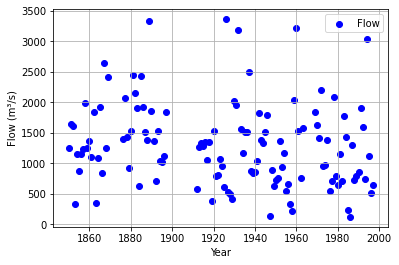

In [11]:
plt.figure()
plt.scatter(data_year, data_flow, color="blue", label="Flow")
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Flow (m³/s)")
plt.show()

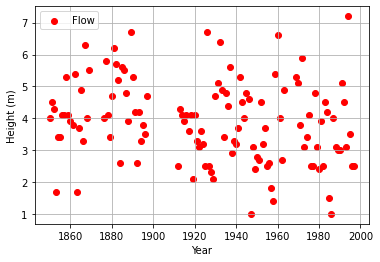

In [12]:
plt.figure()
plt.scatter(data_year, data_height, color="red", label="Flow")
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Height (m)")
plt.show()

-3.37386226929861e-7*x**2 + 0.00287842203565259*x + 0.873733488956883
[   0.            3.5035035     7.00700701   10.51051051   14.01401401
   17.51751752   21.02102102   24.52452452   28.02802803   31.53153153
   35.03503504   38.53853854   42.04204204   45.54554555   49.04904905
   52.55255255   56.05605606   59.55955956   63.06306306   66.56656657
   70.07007007   73.57357357   77.07707708   80.58058058   84.08408408
   87.58758759   91.09109109   94.59459459   98.0980981   101.6016016
  105.10510511  108.60860861  112.11211211  115.61561562  119.11911912
  122.62262262  126.12612613  129.62962963  133.13313313  136.63663664
  140.14014014  143.64364364  147.14714715  150.65065065  154.15415415
  157.65765766  161.16116116  164.66466466  168.16816817  171.67167167
  175.17517518  178.67867868  182.18218218  185.68568569  189.18918919
  192.69269269  196.1961962   199.6996997   203.2032032   206.70670671
  210.21021021  213.71371371  217.21721722  220.72072072  224.22422422
  227.72

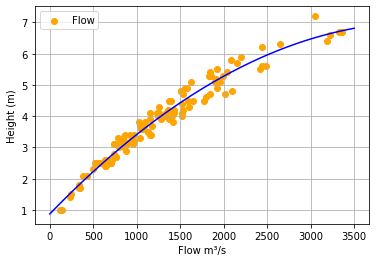

In [44]:
plt.figure()
plt.scatter(data_flow, data_height, color="orange", label="Flow")
plt.legend()
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
regression=np.polyfit(data_flow,data_height,2)

y1=np.poly1d(regression)
x=Symbol('x')
print(expand(y1(x)))

data_flow2=np.linspace(0,3500,1000)
print(data_flow2)
data_height2=y1(data_flow2)
plt.plot(data_flow2, data_height2, color="blue", label="Flow")

plt.show()



Determining missing heights

In [14]:
print(data)


       Year         Flow  Height  year
0    1850.0  1256.402143     4.0  1850
1    1851.0  1648.542191     4.5  1851
2    1852.0  1604.857094     4.3  1852
3    1853.0   341.157419     1.7  1853
4    1854.0  1148.712945     3.4  1854
..      ...          ...     ...   ...
118  1993.0   740.178695     3.1  1993
119  1994.0  3044.380648     7.2  1994
120  1995.0  1127.889906     3.5  1995
121  1996.0   522.151370     2.5  1996
122  1997.0   642.328261     2.5  1997

[123 rows x 4 columns]
